In [1]:
pip install nltk

In [2]:
pip install transformers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset information
We found this data on kaggle(https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018/data) but the data regarding the collection of original data is down below:-

https://kdd.cs.ksu.edu/Publications/Student/kallumadi2018aspect.pdf

Summary regarding the data collected:-
*   The study collected user reviews and ratings on drug experiences from two web sources: Drugs.com and Druglib.com, both catering to consumers and healthcare professionals.
*   
Drugs.com, the larger source, provided 215,063 reviews and 6,345 individual drugs, while Druglib.com offered 3,551 reviews but with a more structured approach. Data extraction was performed using Python's Beautiful Soup library.

Dataset features:-
*   uniqueID: Identifier for the review .
*   drugName: Name of the drug .
*   
review: Text of the review .
*   
rating: Numerical rating given to the drug .
*   date: Date of the review .
*   
usefulCount: Number of times the review was found useful .

#Importing the necessary Libraries

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df_train=pd.read_csv(r"/content/drive/MyDrive/archive-5/drugsComTest_raw.csv")
df_test=pd.read_csv(r"/content/drive/MyDrive/archive-5/drugsComTest_raw.csv")

In [7]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [58]:
data = pd.concat([df_train, df_test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [59]:
data.describe()

,uniqueID,rating,usefulCount
count,107532.000000,107532.000000,107532.000000
mean,116386.701187,6.976900,27.989752
std,67017.428260,3.285192,36.172665
min,0.000000,1.000000,0.000000
25%,58272.000000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174588.000000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107532 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     107532 non-null  int64 
 1   drugName     107532 non-null  object
 2   condition    106942 non-null  object
 3   review       107532 non-null  object
 4   rating       107532 non-null  int64 
 5   date         107532 non-null  object
 6   usefulCount  107532 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.6+ MB


#Explanatory Data Analysis to check the distribution of the data

Text(0, 0.5, 'Rating')

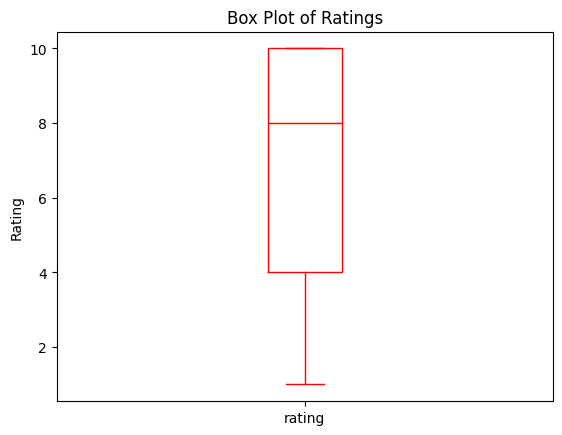

In [9]:
#boxplot
data['rating'].plot(kind='box', color='red')
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')

Text(0.5, 0, 'Rating')

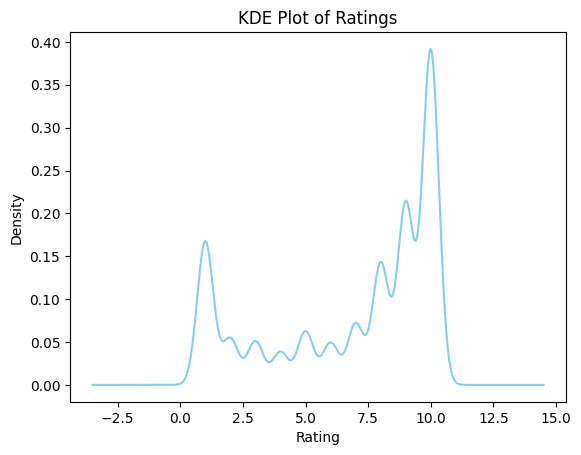

In [10]:
#kernel density plot
data['rating'].plot(kind='kde', color='skyblue')
plt.title('KDE Plot of Ratings')
plt.xlabel('Rating')

Text(0.5, 0, 'Rating')

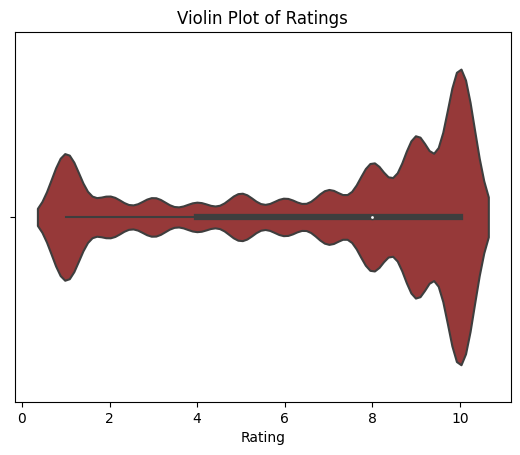

In [11]:
import seaborn as sns
sns.violinplot(data=data, x='rating', color='brown')
plt.title('Violin Plot of Ratings')
plt.xlabel('Rating')

Word clouds are used in EDA to offer a visual summary of the most common words in a text dataset. They help quickly identify prevalent themes, trends, and issues, aiding in data exploration and communication. In the context of drug reviews, word clouds reveal frequently mentioned terms like drug names and side effects, simplifying the initial dataset understanding.

Text(0.5, 1.0, 'Word Cloud of Drug Reviews')

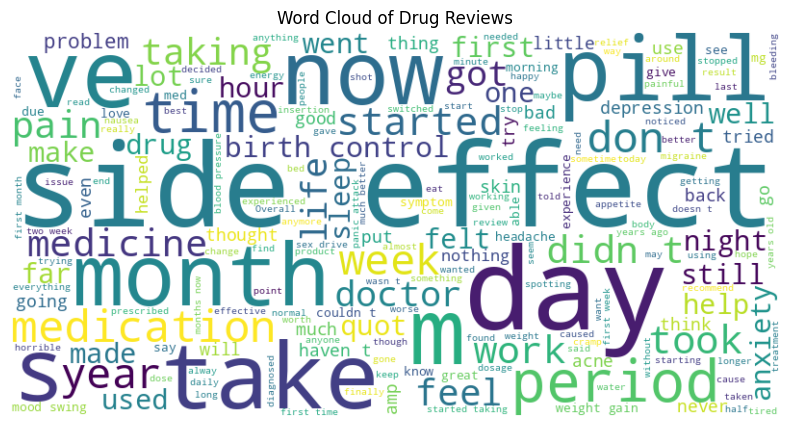

In [12]:
from wordcloud import WordCloud

text = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Drug Reviews')

The map_rating_to_sentiment function maps numerical ratings to sentiment labels for ease of analysis. Ratings of 5 or lower are labeled as 'negative,' ratings between 6 and 7 are labeled as 'neutral,' and ratings above 7 are labeled as 'positive.' This mapping simplifies sentiment analysis and categorizes ratings into these three sentiment classes, making it easier to interpret and work with the data.

In [13]:
# Define a function to map the ratings to sentiments
def map_rating_to_sentiment(rating):
    if rating <= 5:
        return 'negative'
    elif rating <= 7:
        return 'neutral'
    else:
        return 'positive'


In [14]:
import plotly.express as px

# Assuming you have a DataFrame named 'data' with a 'rating' column
data['sentiment'] = data['rating'].apply(map_rating_to_sentiment)

# Create a pie chart for sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig_sentiment = px.pie(sentiment_counts, names='Sentiment', values='Count',
                       color_discrete_sequence=px.colors.qualitative.Set1,
                       title='Sentiment Distribution Based on Ratings')

# Create a histogram for rating distribution
rating_counts = data['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig_rating = px.bar(rating_counts, x='Rating', y='Count',
                    title='Rating Distribution', labels={'Rating': 'Rating', 'Count': 'Count'})

# Show both plots separately
fig_sentiment.show()
fig_rating.show()


Featuring Engineering and Pre-processing

In [15]:
df_train.shape,df_test.shape

((53766, 7), (53766, 7))

In [16]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

Balanced data size (10k for training and 5k for testing) in Python notebook for computational efficiency, reduced bias, and cost-effective analysis

In [17]:
df_train_sampled=pd.read_csv(r"/content/drive/MyDrive/archive-5/drugsComTest_raw.csv",nrows=10000)
df_test_sampled=pd.read_csv(r"/content/drive/MyDrive/archive-5/drugsComTest_raw.csv",nrows=5000)

Checking the distribution of the  data

The preprocess_text function for text data. This function performs key text processing steps, including converting text to lowercase, handling negations, tokenizing, removing stopwords and punctuation, and lemmatizing words. These steps ensure the text is cleaned and standardized, making it more suitable for sentiment analysis.

In [18]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace negation with 'not_'
    negations = {"isn't": "is not", "aren't": "are not", "wasn't": "was not", "weren't": "were not",
                 "haven't": "have not", "hasn't": "has not", "hadn't": "had not", "won't": "will not",
                 "wouldn't": "would not", "don't": "do not", "doesn't": "does not", "didn't": "did not",
                 "can't": "cannot", "couldn't": "could not", "shouldn't": "should not",
                 "mightn't": "might not", "mustn't": "must not"}
    for negation, replacement in negations.items():
        text = re.sub(negation, replacement, text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and punctuation, and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

We clean and structure the text in both the training and testing datasets while also categorizing ratings into sentiment labels. This process ensures that the text data is properly formatted and the ratings are associated with their corresponding sentiments for analysis.

In [19]:
# Preprocess the review text and map ratings to sentiments
df_train_sampled['preprocessed_review'] = df_train_sampled['review'].apply(preprocess_text)
df_train_sampled['sentiment'] = df_train_sampled['rating'].apply(map_rating_to_sentiment)

df_test_sampled['preprocessed_review'] = df_test_sampled['review'].apply(preprocess_text)
df_test_sampled['sentiment'] = df_test_sampled['rating'].apply(map_rating_to_sentiment)

# Display the first few rows of the preprocessed training data
df_train_sampled[['review', 'preprocessed_review', 'rating', 'sentiment']].head()

,review,preprocessed_review,rating,sentiment
0,"""I&#039;ve tried a few antidepressants over th...",039 tried antidepressant year citalopram fluox...,10,positive
1,"""My son has Crohn&#039;s disease and has done ...",son crohn 039 disease done well asacol complai...,8,positive
2,"""Quick reduction of symptoms""",quick reduction symptom,9,positive
3,"""Contrave combines drugs that were used for al...",contrave combine drug used alcohol smoking opi...,9,positive
4,"""I have been on this birth control for one cyc...",birth control one cycle reading review type si...,9,positive


In [20]:
# Training Data Sentiment Distribution
fig_train = px.bar(df_train_sampled['sentiment'].value_counts().reset_index(), x='index', y='sentiment', labels={'index': 'Sentiment', 'sentiment': 'Count'})
fig_train.update_traces(marker_color='blue')
fig_train.update_layout(title='Training Data Sentiment Distribution', xaxis_title='', yaxis_title='Count')

# Testing Data Sentiment Distribution
fig_test = px.bar(df_test_sampled['sentiment'].value_counts().reset_index(), x='index', y='sentiment', labels={'index': 'Sentiment', 'sentiment': 'Count'})
fig_test.update_traces(marker_color='green')
fig_test.update_layout(title='Testing Data Sentiment Distribution', xaxis_title='', yaxis_title='Count')

# Display the plots
fig_train.show()
fig_test.show()


#Splitting data into Train and Test

The TfidfVectorizer is a tool that converts text data into numerical vectors, emphasizing the importance of words by considering their frequency in a document relative to their occurrence in a larger collection of documents. The max_features=5000 parameter limits the feature set to the top 5000 most relevant words. By transforming the preprocessed text into numerical vectors, it enables machine learning models to work with and understand the text data

In [21]:
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(df_train_sampled['preprocessed_review']).toarray()
X_test = tfidf.transform(df_test_sampled['preprocessed_review']).toarray()

The LabelEncoder in this code is used to convert sentiment labels ('negative,' 'neutral,' 'positive') into numerical values.

In [22]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train_sampled['sentiment'])
y_test = encoder.transform(df_test_sampled['sentiment'])

 We use to_categorical to encode labels because neural networks typically require labels to be represented as one-hot encoded vectors. This encoding transforms categorical labels into a binary format, where each label corresponds to a unique bit position. It ensures that the neural network can effectively distinguish and predict among multiple classes, making it compatible with multi-class classification tasks and allowing the network to output probabilities for each class.

In [23]:
# For deep learning models, we need to convert the labels to categorical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

In [24]:
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_part_nn, X_val_nn, y_train_nn_part, y_val_nn = train_test_split(X_train, y_train_nn, test_size=0.2, random_state=42)

#Model Building and Training the dataset

##Training the data with Traditional Models

1) Naive Bayes Classifier

A Naive Bayes classifier is a probabilistic machine learning algorithm used for classification tasks, especially in natural language processing. It's based on Bayes' theorem and makes a "naive" assumption that features (or words in text data) are conditionally independent. This assumption simplifies the calculation of probabilities and makes it efficient for text classification.

Steps of the code:-
*   Text data is converted to numerical features using TF-IDF.
*   Sentiment labels are encoded.
*   The classifier is trained on the training data.
*   Sentiments are predicted for test data.
*   Log probabilities of words are sorted to identify influential words.
*   
Feature names (words) are extracted from TF-IDF.



In [25]:
#Initialize the TF-IDF vectorizer and encode the text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(df_train_sampled['preprocessed_review'])
X_test_tfidf = tfidf.transform(df_test_sampled['preprocessed_review'])

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train_sampled['sentiment'])
y_test = encoder.transform(df_test_sampled['sentiment'])

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict the sentiments for test data
y_pred = nb.predict(X_test_tfidf)

# Get the log probabilities of features given a class
neg_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()
neu_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = nb.feature_log_prob_[2, :].argsort()

# Get the feature names
feature_names = np.array(tfidf.get_feature_names_out())

# Print the top 20 indicative words for each class
print("Top 20 Negative class words:", feature_names[neg_class_prob_sorted[-20:]])
print("Top 20 Neutral class words:", feature_names[neu_class_prob_sorted[-20:]])
print("Top 20 Positive class words:", feature_names[pos_class_prob_sorted[-20:]])

Top 20 Negative class words: ['feel' 'year' 'would' 'took' 'never' 'first' 'side' 'started' 'effect'
 'get' 'time' 'period' 'like' 'taking' 'pain' 'pill' 'week' 'month' 'day'
 '039']
Top 20 Neutral class words: ['also' 'work' 'get' 'weight' 'pill' 'feel' 'started' 'first' 'side'
 'take' 'effect' 'year' 'time' 'pain' 'week' 'taking' 'period' 'day'
 'month' '039']
Top 20 Positive class words: ['get' 'started' 'medication' 'medicine' 'pill' 'period' 'feel' 'first'
 'time' 'taking' 'week' 'month' 'take' 'pain' 'side' 'work' 'effect'
 'year' 'day' '039']


In [26]:
# Evaluate Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.45      0.60      1507
           1       0.00      0.00      0.00       458
           2       0.71      0.99      0.83      3035

    accuracy                           0.74      5000
   macro avg       0.53      0.48      0.48      5000
weighted avg       0.70      0.74      0.68      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



2) SVM Classifier

The Support Vector Machine (SVM) classifier is a machine learning algorithm used for binary and multiclass classification tasks. In sentiment analysis, SVM is applied to categorize text data, such as reviews or comments, into sentiment classes, typically "positive" and "negative" or "positive," "neutral," and "negative."

SVM's main function in sentiment analysis is to learn a decision boundary (hyperplane) that best separates text data points belonging to different sentiment classes. It achieves this by maximizing the margin between the classes, creating a robust decision boundary. SVM can also handle non-linear data through the use of kernels, making it versatile for various sentiment analysis tasks.
*   Model Creation: We establish a linear SVM model with a 'linear' kernel. This model learns patterns in the text data that help classify sentiments.
*   Sentiment Prediction: The trained SVM model is employed to predict sentiment labels for the test data.
*   Feature Importance: We retrieve the coefficients (weights) assigned to each feature (words) by the SVM model. These coefficients signify the importance of words in sentiment classification.
*   Feature Names: We also capture the feature names (words) used in the TF-IDF vectorization process.
*  Top Words: To understand which words are most influential for each sentiment class, we print the top 20 indicative words for the 'negative,' 'neutral,' and 'positive' sentiment classes based on the SVM coefficients.





In [27]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_part, y_train_part)
y_pred_svm = svm_model.predict(X_test)

In [28]:
coef_svm = svm_model.coef_
coef_svm_sorted = np.argsort(coef_svm)

# Get the feature names
feature_names = np.array(tfidf.get_feature_names_out())

# Print the top 20 indicative words for each class
print("Top 20 Negative class words:", feature_names[coef_svm_sorted[0][-20:]])
print("Top 20 Neutral class words:", feature_names[coef_svm_sorted[1][-20:]])
print("Top 20 Positive class words:", feature_names[coef_svm_sorted[2][-20:]])

Top 20 Negative class words: ['stopped' 'stand' 'stable' 'unfortunately' 'drug' 'going' 'hand' 'rough'
 'depressed' 'stop' 'running' 'mess' 'nightmare' 'made' 'vision' 'ended'
 'nothing' 'always' 'removed' 'horrible']
Top 20 Neutral class words: ['vaginal' 'weakness' 'tear' 'disappointed' 'bleeding' 'switched'
 'increased' 'switch' 'discontinue' 'vision' 'caused' 'depressed' 'never'
 'angry' 'gained' 'horrible' 'ended' 'removed' 'worse' 'worst']
Top 20 Positive class words: ['describe' 'resulted' 'belly' 'increase' 'concerning' 'depressive' 'bp'
 'gained' 'developed' 'retention' 'dizziness' 'third' 'rash' 'tape'
 'stuffy' 'increased' 'interferon' 'worst' 'impact' 'chin']


In [29]:
# Evaluate SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1507
           1       0.92      0.02      0.05       458
           2       0.81      0.95      0.88      3035

    accuracy                           0.81      5000
   macro avg       0.84      0.58      0.57      5000
weighted avg       0.82      0.81      0.77      5000



##Training the data using Neural Networks

1) FeedForward Neural Network:

This code defines a deep learning model for a classification task. It includes multiple layers of neurons with ReLU activation functions, which help the model learn complex patterns in the data. Dropout layers are added to prevent overfitting by randomly deactivating some neurons. The model is configured to categorize data into one of three classes and uses the softmax activation function in the final layer to make class predictions. It measures performance with accuracy and uses the Adam optimizer, which fine-tunes the model's learning process for improved classification accuracy.

In [30]:
dl_model = Sequential()

In [31]:
dl_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
dl_model.add(Dropout(0.5))  # Add dropout of 50% to layer

In [32]:
# Additional hidden layers with dropout
dl_model.add(Dense(256, activation='relu'))
dl_model.add(Dropout(0.5))  # Add dropout of 50% to layer
dl_model.add(Dense(128, activation='relu'))
dl_model.add(Dropout(0.5))  # Add dropout of 50% to layer
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.5))  # Add dropout of 50% to layer

In [33]:
# Output layer remains the same
dl_model.add(Dense(3, activation='softmax'))  # 3 for three class labels

# Compile the model
dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [34]:
dl_model.fit(X_train_part_nn, y_train_nn_part, epochs=10, batch_size=128, verbose=1, validation_data=(X_val_nn, y_val_nn))


Epoch 1/10
63/63 [==============================] - 7s 85ms/step - loss: 0.9291 - accuracy: 0.5871 - val_loss: 0.8019 - val_accuracy: 0.6180
Epoch 2/10
63/63 [==============================] - 4s 64ms/step - loss: 0.7416 - accuracy: 0.6718 - val_loss: 0.6813 - val_accuracy: 0.7510
Epoch 3/10
63/63 [==============================] - 6s 90ms/step - loss: 0.5487 - accuracy: 0.7991 - val_loss: 0.6886 - val_accuracy: 0.7390
Epoch 4/10
63/63 [==============================] - 4s 58ms/step - loss: 0.3872 - accuracy: 0.8534 - val_loss: 0.8223 - val_accuracy: 0.7505
Epoch 5/10
63/63 [==============================] - 4s 57ms/step - loss: 0.2569 - accuracy: 0.8876 - val_loss: 1.0681 - val_accuracy: 0.7360
Epoch 6/10
63/63 [==============================] - 4s 66ms/step - loss: 0.1811 - accuracy: 0.9367 - val_loss: 1.2556 - val_accuracy: 0.7125
Epoch 7/10
63/63 [==============================] - 6s 88ms/step - loss: 0.1134 - accuracy: 0.9656 - val_loss: 1.5567 - val_accuracy: 0.6910
Epoch 8/10
63

In [35]:
# Evaluate Deep Learning Model
y_pred_nn = dl_model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

157/157 [==============================] - 1s 8ms/step


In [36]:
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn_classes))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1507
           1       0.85      0.84      0.84       458
           2       0.96      0.97      0.96      3035

    accuracy                           0.94      5000
   macro avg       0.92      0.91      0.91      5000
weighted avg       0.94      0.94      0.94      5000



In [37]:
print(y_pred_nn)

[[8.1382410e-20 5.4757440e-16 9.9999994e-01]
 [2.2980488e-10 1.3748357e-08 9.9999994e-01]
 [1.2637214e-04 2.5464084e-03 9.9732727e-01]
 ...
 [2.4193663e-17 1.0150360e-13 9.9999994e-01]
 [4.6193563e-07 1.3035920e-05 9.9998647e-01]
 [6.6781806e-15 8.2525375e-12 9.9999994e-01]]


In [38]:
y_pred_labels = np.argmax(y_pred_nn, axis=1)

# Create a DataFrame with the original labels and predicted class labels
df = pd.DataFrame({'Expected': y_test, 'Predicted': y_pred_labels})

# Display the DataFrame
print(df)

      Expected  Predicted
0            2          2
1            2          2
2            2          2
3            2          2
4            2          2
...        ...        ...
4995         0          0
4996         2          2
4997         2          2
4998         2          2
4999         2          2

[5000 rows x 2 columns]


#GRU (Gated Recurrent Unit): GRU is a type of recurrent neural network similar to LSTM but with a simpler architecture. They are computationally less expensive and may train faster, making them a good alternative to LSTM.

*   The model consists of several dense layers with ReLU activation functions, allowing it to learn complex patterns in the data.
*   Dropout layers are inserted after each dense layer to prevent overfitting by deactivating some neurons during training.

*  The final layer, with a softmax activation function, predicts one of three classes.
*   The model uses the categorical cross-entropy loss function, the Adam optimizer with a learning rate of 0.001, and measures performance using accuracy.





In [39]:
dl_model_gru = Sequential()


input_dim = X_train_part_nn.shape[1]
dl_model_gru.add(Dense(512, input_dim=input_dim, activation='relu'))

# Dropout layer
dl_model_gru.add(Dropout(0.5))

# Additional hidden layers with dropout
dl_model_gru.add(Dense(256, activation='relu'))
dl_model_gru.add(Dropout(0.5))

dl_model_gru.add(Dense(128, activation='relu'))
dl_model_gru.add(Dropout(0.5))

dl_model_gru.add(Dense(64, activation='relu'))
dl_model_gru.add(Dropout(0.5))

# Output layer
dl_model_gru.add(Dense(3, activation='softmax'))  # 3 for three class labels

# Compile the model
dl_model_gru.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Summary of the model
dl_model_gru.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2560512   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [40]:
dl_model_gru.fit(X_train_part_nn, y_train_nn_part, epochs=10, batch_size=128, verbose=1, validation_data=(X_val_nn, y_val_nn))


Epoch 1/10
63/63 [==============================] - 7s 95ms/step - loss: 0.9184 - accuracy: 0.5938 - val_loss: 0.8147 - val_accuracy: 0.6180
Epoch 2/10
63/63 [==============================] - 4s 56ms/step - loss: 0.7506 - accuracy: 0.6655 - val_loss: 0.7067 - val_accuracy: 0.7495
Epoch 3/10
63/63 [==============================] - 3s 54ms/step - loss: 0.5570 - accuracy: 0.7925 - val_loss: 0.6935 - val_accuracy: 0.7480
Epoch 4/10
63/63 [==============================] - 4s 56ms/step - loss: 0.3965 - accuracy: 0.8501 - val_loss: 0.8035 - val_accuracy: 0.7405
Epoch 5/10
63/63 [==============================] - 6s 90ms/step - loss: 0.2643 - accuracy: 0.8886 - val_loss: 1.0171 - val_accuracy: 0.7375
Epoch 6/10
63/63 [==============================] - 4s 62ms/step - loss: 0.1789 - accuracy: 0.9367 - val_loss: 1.3239 - val_accuracy: 0.7090
Epoch 7/10
63/63 [==============================] - 4s 57ms/step - loss: 0.1175 - accuracy: 0.9621 - val_loss: 1.6820 - val_accuracy: 0.6985
Epoch 8/10
63

In [41]:
# Predict classes on the test data
y_pred_gru = dl_model_gru.predict(X_test)
y_pred_gru_classes = y_pred_gru.argmax(axis=-1)

# Convert one-hot encoded y_test to categorical labels
y_test_categorical = y_test_nn.argmax(axis=1)

# Generate a classification report
report = classification_report(y_test_categorical, y_pred_gru_classes)
print(report)

157/157 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1507
           1       0.78      0.86      0.82       458
           2       0.96      0.96      0.96      3035

    accuracy                           0.94      5000
   macro avg       0.89      0.91      0.90      5000
weighted avg       0.94      0.94      0.94      5000



In [42]:
# Convert one-hot encoded y_test to categorical labels
y_test_categorical = y_test_nn.argmax(axis=1)

# Create a DataFrame with the original labels and predicted class labels
df = pd.DataFrame({'Expected': y_test_categorical, 'Predicted': y_pred_gru_classes})

# Display the DataFrame
print(df)


      Expected  Predicted
0            2          2
1            2          2
2            2          2
3            2          2
4            2          2
...        ...        ...
4995         0          1
4996         2          2
4997         2          2
4998         2          2
4999         2          2

[5000 rows x 2 columns]


#Performance Comparision of all the models used

In [43]:
# Create a list of model names
models = ["Naive Bayes", "SVM", "Neural Network", "GRU Model"]

# Create a list of metric values for each model
accuracy_values = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_nn_classes), accuracy_score(y_test_categorical, y_pred_gru_classes)]
precision_values = [precision_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred_svm, average='weighted'),
                    precision_score(y_test, y_pred_nn_classes, average='weighted'), precision_score(y_test_categorical, y_pred_gru_classes, average='weighted')]
recall_values = [recall_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred_svm, average='weighted'),
                 recall_score(y_test, y_pred_nn_classes, average='weighted'), recall_score(y_test_categorical, y_pred_gru_classes, average='weighted')]
f1_score_values = [f1_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred_svm, average='weighted'),
                   f1_score(y_test, y_pred_nn_classes, average='weighted'), f1_score(y_test_categorical, y_pred_gru_classes, average='weighted')]

# Create a trace for each metric
accuracy_trace = go.Bar(x=models, y=accuracy_values, name='Accuracy', text=accuracy_values, textposition='auto')
precision_trace = go.Bar(x=models, y=precision_values, name='Precision', text=precision_values, textposition='auto')
recall_trace = go.Bar(x=models, y=recall_values, name='Recall', text=recall_values, textposition='auto')
f1_score_trace = go.Bar(x=models, y=f1_score_values, name='F1 Score', text=f1_score_values, textposition='auto')

# Create a data list with all the traces
data = [accuracy_trace, precision_trace, recall_trace, f1_score_trace]

# Create the layout
layout = go.Layout(barmode='group', title='Classification Metrics by Model', xaxis_title='Models', yaxis_title='Metric Value')

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the interactive chart
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
dl_model_gru.save('dl_model_gru.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [45]:
#run this first
!pip install -q streamlit

In [46]:
#then this
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your trained GRU model
loaded_model = load_model('dl_model_gru.h5')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
max_sequence_length = 5000  # You can adjust the sequence length as needed

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace negation with 'not_'
    negations = {
        "isn't": "is not", "aren't": "are not", "wasn't": "was not", "weren't": "were not",
        "haven't": "have not", "hasn't": "has not", "hadn't": "had not", "won't": "will not",
        "wouldn't": "would not", "don't": "do not", "doesn't": "does not", "didn't": "did not",
        "can't": "cannot", "couldn't": "could not", "shouldn't": "should not",
        "mightn't": "might not", "mustn't": "must not"
    }
    for negation, replacement in negations.items():
        text = re.sub(negation, replacement, text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and punctuation, and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

# Function to predict sentiment
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([processed_review])
    sequence = tokenizer.texts_to_sequences([processed_review])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = loaded_model.predict(padded_sequence)
    sentiment = np.argmax(prediction, axis=1)
    if sentiment == 0:
        return 'Negative'
    elif sentiment == 1:
        return 'Neutral'
    else:
        return 'Positive'

# Streamlit interface
st.title("Drug Review Sentiment Analysis")
review_text = st.text_area("Enter the review:")

if st.button("Predict Sentiment"):
    if review_text:
        sentiment = predict_sentiment(review_text)
        st.write(f"The predicted sentiment is: {sentiment}")
    else:
        st.warning("Please enter a review text.")

Overwriting app.py


run the code cells in the following order to see the deployment of streamlit app

In [47]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.292s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [52]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.86.60.5


In [53]:
!streamlit run app.py &>/content/logs.txt &

In [54]:
!npx localtunnel --port 8501

npx: installed 22 in 2.592s
your url is: https://cruel-kings-design.loca.lt
^C


#References
1) https://kdd.cs.ksu.edu/Publications/Student/kallumadi2018aspect.pdf

2) https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018/data

3) https://www.kaggle.com/code/harshjain123/drugs-review-sentiment

4) https://discuss.streamlit.io/t/how-to-launch-streamlit-app-from-google-colab-notebook/42399/3